Importing Necessary Packages

In [3]:
!pip install tensorflow

  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

C:\Users\kulka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading the training and testing data (MNIST)

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

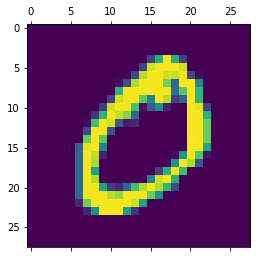

In [5]:
plt.matshow(x_train[1])

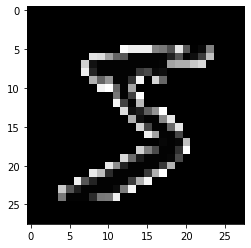

In [6]:
plt.imshow(-x_train[0],cmap="gray")

In [7]:
x_train = x_train/255
y_train = y_train/255

Define the network architecture using keras

In [8]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation="relu"),keras.layers.Dense(10,activation="softmax")])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model using SGD

In [11]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0159 - accuracy: 0.0987 - val_loss: 2752.1980 - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 7.8877e-04 - accuracy: 0.0987 - val_loss: 3037.3347 - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 4.4832e-04 - accuracy: 0.0987 - val_loss: 3206.6086 - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.1317e-04 - accuracy: 0.0987 - val_loss: 3327.7119 - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.4035e-04 - accuracy: 0.0987 - val_loss: 3422.4492 - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9479e-04 - accuracy: 0.0987 - val_loss: 3500.3433 - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6362e-04 - accuracy:

Evaluate the Network

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 3720.8064 - accuracy: 0.0980


In [15]:
print("Loss:",test_loss)
print("Accuracy:",test_acc)

Loss: 3720.806396484375
Accuracy: 0.09799999743700027


In [16]:
n=random.randint(0,9999)

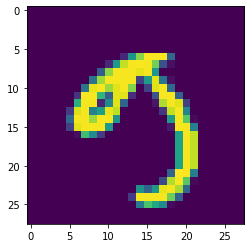

In [17]:
plt.imshow(x_test[n])
plt.show()

In [20]:
predicted_value=model.predict(x_test)

313/313 [==============================] - 0s 856us/step


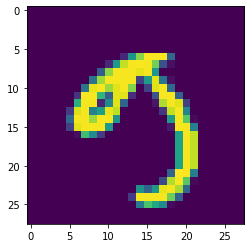

In [21]:
plt.imshow(x_test[n])
plt.show()

In [22]:
print(predicted_value[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Plotting the training accuracy

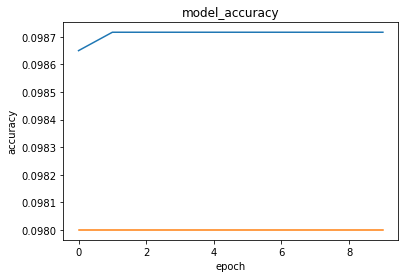

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Plotting the Training Loss

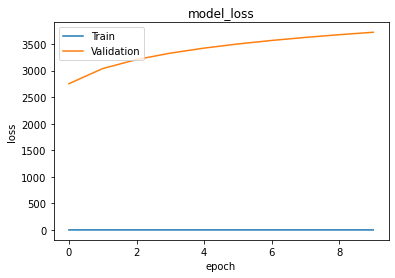

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()